<a href="https://colab.research.google.com/github/chupvl/gcolab/blob/main/2023_02_21_Auto3D_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2023-02-21: Testing Auto3D package

Notebook created by Vladimir Chupakhin, chupvl@gmail.com
- https://www.linkedin.com/in/chupvl
- https://twitter.com/chupvl

Goal of this notebook is to test [Auto3D](https://github.com/isayevlab/Auto3D_pkg) for conformer generation for drug like compounds using Google Colaboratory. Auto3D was developed in the group of Professor [Olexandr Isayev](https://www.cmu.edu/chemistry/people/faculty/isayev.html) and published in [2022](https://pubs.acs.org/doi/10.1021/acs.jcim.2c00817). 



## Libs

In [1]:
!pip install py3Dmol

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install rdkit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.3/29.3 MB 46.1 MB/s eta 0:00:00


In [4]:
!sudo apt-get install python3-openbabel
# !pip install openbabel will fail with "legacy-install-failure" error
# so, going the other route

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  libopenbabel6 libschroedinger-maeparser1
The following NEW packages will be installed:
  libopenbabel6 libschroedinger-maeparser1 python3-openbabel
0 upgraded, 3 newly installed, 0 to remove and 21 not upgraded.
Need to get 4,213 kB of archives.
After this operation, 20.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 libschroedinger-maeparser1 amd64 1.2.2-1build1 [89.1 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 libopenbabel6 amd64 3.0.0+dfsg-3ubuntu3 [3,568 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/universe amd64 python3-openbabel amd64 3.0.0+dfsg-3ubuntu3 [556 kB]
Fetched 4,213 kB in 1s (4,644 kB/s)
debconf: unable t

In [12]:
!pip install Auto3D --default-timeout=100

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
# ok, doing with  pip installation via local clone
# if above is timed out use function below
# !git clone https://github.com/isayevlab/Auto3D_pkg.git
# !pip install ./Auto3D_pkg/. 

Cloning into 'Auto3D_pkg'...
remote: Enumerating objects: 592, done.
remote: Counting objects: 100% (125/125), done.
remote: Compressing objects: 100% (108/108), done.
remote: Total 592 (delta 29), reused 45 (delta 17), pack-reused 467
Receiving objects: 100% (592/592), 113.06 MiB | 40.40 MiB/s, done.
Resolving deltas: 100% (311/311), done.


In [14]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import PandasTools
from rdkit.Chem.MolStandardize import rdMolStandardize

import py3Dmol
import Auto3D

from ipywidgets import interact, interactive, fixed, Dropdown

import numpy as np
import pandas as pd

## Functions

In [15]:
def mol_clashes(mol, dist_cutoff=1, verbose=False):
    '''for a rdkit molecule return number of clashes with a specified cutoff''' 
    distances = AllChem.Get3DDistanceMatrix(mol)
    nClashes = sum(distances[np.triu_indices(len(distances), k = 1)] < dist_cutoff)
    if verbose:
        if nClashes > 0:
            print(f'Number of clashes between atoms: {nClashes}')
        else:
            print(f'There are no clashes between atoms')
    return nClashes

In [16]:
# from: http://rdkit.blogspot.com/2016/07/using-ipywidgets-and-py3dmol-to-browse.html
def drawit(m, p):
        mb = Chem.MolToMolBlock(m)
        p.removeAllModels()
        p.addModel(mb,'sdf')
        p.setStyle({'stick':{}})
        p.setBackgroundColor('0xeeeeee')
        p.zoomTo()
        return p.show()

## Tesing Auto3D

In [17]:
from Auto3D.auto3D import options, main
print(Auto3D.__version__)

2.0


In [19]:
%%time
smiles_file = './Auto3D_pkg/example/files/smiles.smi'
if __name__ == "__main__":
    path = smiles_file
    args = options(path, k=1, use_gpu=True)   #specify the parameters for Auto3D 
    out = main(args)            #main acceps the parameters and run Auto3D
    print(out)

INFO:auto3d:
             _              _             _____   ____  
            / \     _   _  | |_    ___   |___ /  |  _ \ 
           / _ \   | | | | | __|  / _ \    |_ \  | | | |
          / ___ \  | |_| | | |_  | (_) |  ___) | | |_| |
         /_/   \_\  \__,_|  \__|  \___/  |____/  |____/  2.0
                // Automatic generation of the low-energy 3D structures                                      
        
INFO:auto3d:================================================================================
INFO:auto3d:                               INPUT PARAMETERS
INFO:auto3d:================================================================================
INFO:auto3d:path: ./Auto3D_pkg/example/files/smiles.smi
INFO:auto3d:k: 1
INFO:auto3d:window: False
INFO:auto3d:verbose: False
INFO:auto3d:job_name: 20230222-155817-731514
INFO:auto3d:enumerate_tautomer: False
INFO:auto3d:tauto_engine: rdkit
INFO:auto3d:pKaNorm: True
INFO:auto3d:isomer_engine: rdkit
INFO:auto3d:enumerate_isomer: Tru

Checking input file...


INFO:auto3d:	There are 4 SMILES in the input file ./Auto3D_pkg/example/files/smiles.smi. 
	All SMILES and IDs are valid.
INFO:auto3d:Suggestions for choosing isomer_engine and optimizing_engine: 
INFO:auto3d:	Isomer engine options: RDKit and Omega.
INFO:auto3d:	Optimizing engine options: ANI2x, ANI2xt and AIMNET.
INFO:auto3d:The available memory is 15 GB.
INFO:auto3d:The task will be divided into 1 jobs.
INFO:auto3d:Job1, number of inputs: 4


	There are 4 SMILES in the input file ./Auto3D_pkg/example/files/smiles.smi. 
	All SMILES and IDs are valid.
Suggestions for choosing isomer_engine and optimizing_engine: 
	Isomer engine options: RDKit and Omega.
	Optimizing engine options: ANI2x, ANI2xt and AIMNET.
The available memory is 15 GB.
The task will be divided into 1 jobs.
Job1, number of inputs: 4


INFO:auto3d:Energy unit: Hartree if implicit.
INFO:auto3d:Program running time: 0 minutes
INFO:auto3d:Output path: /content/Auto3D_pkg/example/files/20230222-155817-731514_smiles/smiles_out.sdf


Energy unit: Hartree if implicit.
Program running time: 0 minutes
Output path: /content/Auto3D_pkg/example/files/20230222-155817-731514_smiles/smiles_out.sdf
/content/Auto3D_pkg/example/files/20230222-155817-731514_smiles/smiles_out.sdf
CPU times: user 261 ms, sys: 649 ms, total: 910 ms
Wall time: 33.6 s


In [20]:
wall_time = 34
print(f'Seconds per compound: {wall_time/4}')
# # patience is important parameter according to Zhen (M2D2 talk)

Seconds per compound: 8.5


,ID,E_tot,fmax,Converged,E_rel(kcal/mol),ROMol
0,smi1,-479.9679257386429,0.0028632120229303837,True,0.0,
1,smi2,-232.66908617406136,0.002958697732537985,True,0.0,
2,smi3,-346.07272607393577,0.0028641908429563046,True,0.0,
3,smi4,-349.49279513970663,0.002949257381260395,True,0.0,

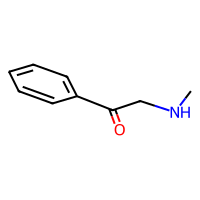
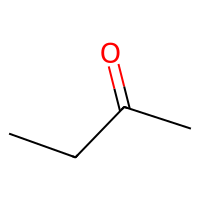
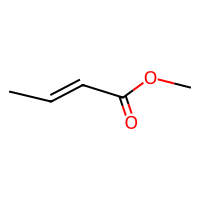
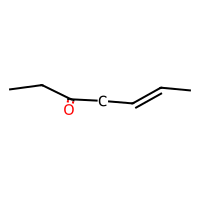

In [22]:
df = PandasTools.LoadSDF('/content/Auto3D_pkg/example/files/20230222-155817-731514_smiles/smiles_out.sdf')
df

In [23]:
%%time
smiles_file = './Auto3D_pkg/example/files/smiles.smi'
if __name__ == "__main__":
    path = smiles_file
    args = options(path, k=1, use_gpu=True, patience=100)   #specify the parameters for Auto3D 
    out = main(args)            #main acceps the parameters and run Auto3D
    print(out)

INFO:auto3d:
             _              _             _____   ____  
            / \     _   _  | |_    ___   |___ /  |  _ \ 
           / _ \   | | | | | __|  / _ \    |_ \  | | | |
          / ___ \  | |_| | | |_  | (_) |  ___) | | |_| |
         /_/   \_\  \__,_|  \__|  \___/  |____/  |____/  2.0
                // Automatic generation of the low-energy 3D structures                                      
        
INFO:auto3d:================================================================================
INFO:auto3d:                               INPUT PARAMETERS
INFO:auto3d:================================================================================
INFO:auto3d:path: ./Auto3D_pkg/example/files/smiles.smi
INFO:auto3d:k: 1
INFO:auto3d:window: False
INFO:auto3d:verbose: False
INFO:auto3d:job_name: 20230222-155940-304635
INFO:auto3d:enumerate_tautomer: False
INFO:auto3d:tauto_engine: rdkit
INFO:auto3d:pKaNorm: True
INFO:auto3d:isomer_engine: rdkit
INFO:auto3d:enumerate_isomer: Tru

Checking input file...
	There are 4 SMILES in the input file ./Auto3D_pkg/example/files/smiles.smi. 
	All SMILES and IDs are valid.
Suggestions for choosing isomer_engine and optimizing_engine: 
	Isomer engine options: RDKit and Omega.
	Optimizing engine options: ANI2x, ANI2xt and AIMNET.
The available memory is 15 GB.
The task will be divided into 1 jobs.
Job1, number of inputs: 4


INFO:auto3d:Energy unit: Hartree if implicit.
INFO:auto3d:Program running time: 0 minutes
INFO:auto3d:Output path: /content/Auto3D_pkg/example/files/20230222-155940-304635_smiles/smiles_out.sdf


Energy unit: Hartree if implicit.
Program running time: 0 minutes
Output path: /content/Auto3D_pkg/example/files/20230222-155940-304635_smiles/smiles_out.sdf
/content/Auto3D_pkg/example/files/20230222-155940-304635_smiles/smiles_out.sdf
CPU times: user 175 ms, sys: 70 ms, total: 245 ms
Wall time: 16.7 s


In [24]:
wall_time = 17
print(f'Seconds per compound: {wall_time/4}')
# # patience is important parameter according to Zhen (M2D2 talk)

Seconds per compound: 4.25


,ID,E_tot,fmax,Converged,E_rel(kcal/mol),ROMol
0,smi1,-479.967925682787,0.0028751068748533726,True,0.0,
1,smi2,-232.6690861473655,0.002975183306261897,True,0.0,
2,smi3,-346.07272605476953,0.0028248142916709185,True,0.0,
3,smi4,-349.4903122393265,0.0029992631170898676,True,0.0,

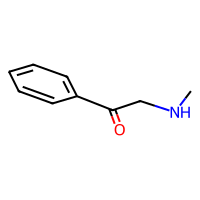
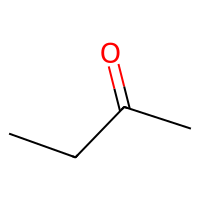
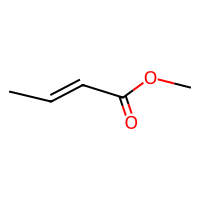
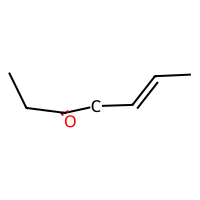

In [25]:
df = PandasTools.LoadSDF('/content/Auto3D_pkg/example/files/20230222-155940-304635_smiles/smiles_out.sdf')
df

## Testing Auto3D: drug-like compounds

In [26]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [28]:
%%time
smiles_file = '/content/gdrive/MyDrive/gcollab/data/chembl_drugs_lite_20230221_test.smi'
if __name__ == "__main__":
    path = smiles_file
    args = options(path, k=1, use_gpu=True, patience=100)   #specify the parameters for Auto3D 
    out = main(args)            #main acceps the parameters and run Auto3D
    print(out)

INFO:auto3d:
             _              _             _____   ____  
            / \     _   _  | |_    ___   |___ /  |  _ \ 
           / _ \   | | | | | __|  / _ \    |_ \  | | | |
          / ___ \  | |_| | | |_  | (_) |  ___) | | |_| |
         /_/   \_\  \__,_|  \__|  \___/  |____/  |____/  2.0
                // Automatic generation of the low-energy 3D structures                                      
        
INFO:auto3d:================================================================================
INFO:auto3d:                               INPUT PARAMETERS
INFO:auto3d:================================================================================
INFO:auto3d:path: /content/gdrive/MyDrive/gcollab/data/chembl_drugs_lite_20230221_test.smi
INFO:auto3d:k: 1
INFO:auto3d:window: False
INFO:auto3d:verbose: False
INFO:auto3d:job_name: 20230222-160208-411749
INFO:auto3d:enumerate_tautomer: False
INFO:auto3d:tauto_engine: rdkit
INFO:auto3d:pKaNorm: True
INFO:auto3d:isomer_engine: rdki

Checking input file...


INFO:auto3d:	There are 10 SMILES in the input file /content/gdrive/MyDrive/gcollab/data/chembl_drugs_lite_20230221_test.smi. 
	All SMILES and IDs are valid.
INFO:auto3d:Suggestions for choosing isomer_engine and optimizing_engine: 
INFO:auto3d:	Isomer engine options: RDKit and Omega.
INFO:auto3d:	Optimizing engine options: ANI2x, ANI2xt and AIMNET.
INFO:auto3d:The available memory is 15 GB.
INFO:auto3d:The task will be divided into 1 jobs.
INFO:auto3d:Job1, number of inputs: 10


	There are 10 SMILES in the input file /content/gdrive/MyDrive/gcollab/data/chembl_drugs_lite_20230221_test.smi. 
	All SMILES and IDs are valid.
Suggestions for choosing isomer_engine and optimizing_engine: 
	Isomer engine options: RDKit and Omega.
	Optimizing engine options: ANI2x, ANI2xt and AIMNET.
The available memory is 15 GB.
The task will be divided into 1 jobs.
Job1, number of inputs: 10


INFO:auto3d:Energy unit: Hartree if implicit.
INFO:auto3d:Program running time: 1 minutes
INFO:auto3d:Output path: /content/gdrive/MyDrive/gcollab/data/20230222-160208-411749_chembl_drugs_lite_20230221_test/chembl_drugs_lite_20230221_test_out.sdf


Energy unit: Hartree if implicit.
Program running time: 1 minutes
Output path: /content/gdrive/MyDrive/gcollab/data/20230222-160208-411749_chembl_drugs_lite_20230221_test/chembl_drugs_lite_20230221_test_out.sdf
/content/gdrive/MyDrive/gcollab/data/20230222-160208-411749_chembl_drugs_lite_20230221_test/chembl_drugs_lite_20230221_test_out.sdf
CPU times: user 528 ms, sys: 117 ms, total: 645 ms
Wall time: 1min 48s


In [29]:
wall_time = 60 + 48
print(f'Seconds per compound: {wall_time/10} ')
# patience is important parameter according to Zhen (M2D2 talk)
# 450 is an overkill

Seconds per compound: 10.8 


In [30]:
f = '/content/gdrive/MyDrive/gcollab/data/20230222-160208-411749_chembl_drugs_lite_20230221_test/chembl_drugs_lite_20230221_test_out.sdf'
df_drugs_test_3D = PandasTools.LoadSDF(f)

In [31]:
for m in df_drugs_test_3D['ROMol'].values:
  n = mol_clashes(m)
  if n > 0:
    print('Molecule has clashes')

In [34]:
options = [(name, value) for name, value in zip(df_drugs_test_3D['ID'], df_drugs_test_3D['ROMol'].values)]
dropdown = Dropdown(options=options)
p = py3Dmol.view(width=600,height=600)
interact(drawit, m=dropdown, p=fixed(p));
# apologies, I removed common names for those compounds...
# also, take into account that those conformations are for the gas phase
# PS: all looks good to me

interactive(children=(Dropdown(description='m', options=(('CHEMBL1537', <rdkit.Chem.rdchem.Mol object at 0x7fd…